## EDA Notebook   

* parse json and create data frame of messages 
* Create checkpoint message dataframe 
* Begin doing visualizations (exported to next EDA notebook) 


In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import json
import os 
import re

In [3]:
from importlib import reload

In [4]:
from Scripts import EDA_functions as mt_eda
reload(mt_eda)

<module 'Scripts.EDA_functions' from '/home/owner/Documents/Github_projects/Tinder_analysis/Scripts/EDA_functions.py'>

In [5]:
data_path = "Data/data.json"

In [6]:
os.path.isfile(data_path)

True

In [7]:
with open(data_path, "rb") as inp: 
    data = json.load(inp)

In [9]:
data.keys()

dict_keys(['Messages', 'Photos', 'Places', 'Purchases', 'Spotify', 'Usage', 'User'])

## Explore Messages "tab"

In [10]:
len(data['Messages'])

169

In [13]:
type(data['Messages'])

list

In [14]:
data['Messages'][:3]

[{'match_id': 'Match 169',
  'messages': [{'to': '5bda0f045c67bcb02727e8c3',
    'from': 'You',
    'message': 'Rose!! 🌹 I get it',
    'sent_date': 'Thu, 29 Nov 2018 06:43:33 GMT'}]},
 {'match_id': 'Match 168',
  'messages': [{'to': '5bdc7209e53ebed626ea4a03',
    'from': 'You',
    'message': 'https://media0.giphy.com/media/6wpHEQNjkd74Q/giphy.gif?width=250&height=132',
    'sent_date': 'Wed, 21 Nov 2018 01:18:37 GMT',
    'type': 'gif',
    'fixed_height': 'https://media0.giphy.com/media/6wpHEQNjkd74Q/200.gif?width=379&height=200'},
   {'to': '5bdc7209e53ebed626ea4a03',
    'from': 'You',
    'message': 'Hahaha that was fantastic!',
    'sent_date': 'Wed, 21 Nov 2018 01:18:55 GMT'},
   {'to': '5bdc7209e53ebed626ea4a03',
    'from': 'You',
    'message': 'Also can you be the phosphorus and i have the big wooden stick 😁👍🏾😉',
    'sent_date': 'Wed, 21 Nov 2018 01:19:30 GMT'},
   {'to': '5bdc7209e53ebed626ea4a03',
    'from': 'You',
    'message': 'Big sticks don’t impress you?',
    's

In [16]:
type(data['Messages'][0])

dict

In [17]:
data['Messages'][1].keys()

dict_keys(['match_id', 'messages'])

In [19]:
data['Messages'][1]

{'match_id': 'Match 168',
 'messages': [{'to': '5bdc7209e53ebed626ea4a03',
   'from': 'You',
   'message': 'https://media0.giphy.com/media/6wpHEQNjkd74Q/giphy.gif?width=250&height=132',
   'sent_date': 'Wed, 21 Nov 2018 01:18:37 GMT',
   'type': 'gif',
   'fixed_height': 'https://media0.giphy.com/media/6wpHEQNjkd74Q/200.gif?width=379&height=200'},
  {'to': '5bdc7209e53ebed626ea4a03',
   'from': 'You',
   'message': 'Hahaha that was fantastic!',
   'sent_date': 'Wed, 21 Nov 2018 01:18:55 GMT'},
  {'to': '5bdc7209e53ebed626ea4a03',
   'from': 'You',
   'message': 'Also can you be the phosphorus and i have the big wooden stick 😁👍🏾😉',
   'sent_date': 'Wed, 21 Nov 2018 01:19:30 GMT'},
  {'to': '5bdc7209e53ebed626ea4a03',
   'from': 'You',
   'message': 'Big sticks don’t impress you?',
   'sent_date': 'Wed, 21 Nov 2018 01:27:49 GMT'},
  {'to': '5bdc7209e53ebed626ea4a03',
   'from': 'You',
   'message': 'That’s probably better for me anyways',
   'sent_date': 'Wed, 21 Nov 2018 01:28:06 GMT'}]

In [20]:
data['Messages'][1]

{'match_id': 'Match 168',
 'messages': [{'to': '5bdc7209e53ebed626ea4a03',
   'from': 'You',
   'message': 'https://media0.giphy.com/media/6wpHEQNjkd74Q/giphy.gif?width=250&height=132',
   'sent_date': 'Wed, 21 Nov 2018 01:18:37 GMT',
   'type': 'gif',
   'fixed_height': 'https://media0.giphy.com/media/6wpHEQNjkd74Q/200.gif?width=379&height=200'},
  {'to': '5bdc7209e53ebed626ea4a03',
   'from': 'You',
   'message': 'Hahaha that was fantastic!',
   'sent_date': 'Wed, 21 Nov 2018 01:18:55 GMT'},
  {'to': '5bdc7209e53ebed626ea4a03',
   'from': 'You',
   'message': 'Also can you be the phosphorus and i have the big wooden stick 😁👍🏾😉',
   'sent_date': 'Wed, 21 Nov 2018 01:19:30 GMT'},
  {'to': '5bdc7209e53ebed626ea4a03',
   'from': 'You',
   'message': 'Big sticks don’t impress you?',
   'sent_date': 'Wed, 21 Nov 2018 01:27:49 GMT'},
  {'to': '5bdc7209e53ebed626ea4a03',
   'from': 'You',
   'message': 'That’s probably better for me anyways',
   'sent_date': 'Wed, 21 Nov 2018 01:28:06 GMT'}]

In [ ]:
# Structure for each item in messages 
{k: type(v) for k, v in data['Messages'][0].items()}

{'match_id': str, 'messages': list}

In [23]:
msg_df = pd.DataFrame(data['Messages'][10]['messages'])

In [26]:
msg_df.head(5)

,from,message,sent_date,to
0,You,Interesting pic by the toilet.... not quite su...,2018-11-10 03:50:33,5b949a891501499e1faa047e


In [25]:
msg_df['sent_date'] = pd.to_datetime(msg_df['sent_date'])

In [25]:
msg_df.columns

Index(['from', 'message', 'sent_date', 'to'], dtype='object')

In [26]:
data['Messages'][107:109]

[{'match_id': 'Match 62', 'messages': []},
 {'match_id': 'Match 61',
  'messages': [{'to': '5603cbd9b2f521ea2c44916c',
    'from': 'You',
    'message': 'Do you believe in ghosts? ',
    'sent_date': 'Sat, 26 Sep 2015 17:40:45 GMT'},
   {'to': '5603cbd9b2f521ea2c44916c',
    'from': 'You',
    'message': "Hey how's it going?  ",
    'sent_date': 'Sat, 26 Sep 2015 17:46:38 GMT'}]}]

[{'match_id': 'Match 62', 'messages': []},
 {'match_id': 'Match 61',
  'messages': [{'to': '5603cbd9b2f521ea2c44916c',
    'from': 'You',
    'message': 'Do you believe in ghosts? ',
    'sent_date': 'Sat, 26 Sep 2015 17:40:45 GMT'},
   {'to': '5603cbd9b2f521ea2c44916c',
    'from': 'You',
    'message': "Hey how's it going?  ",
    'sent_date': 'Sat, 26 Sep 2015 17:46:38 GMT'}]}]

## Make master dataset of all message info

In [27]:
reload(mt_eda)

<module 'Scripts.EDA_functions' from '/home/owner/Documents/Github_projects/Tinder_analysis/Scripts/EDA_functions.py'>

In [33]:
list_of_dfs = [mt_eda.get_msg_df(msg_dict) for msg_dict in data["Messages"]]

In [37]:
list_of_dfs = []
i=0
for x in data["Messages"]:
    i+=1
    try:
        list_of_dfs.append(mt_eda.get_msg_df(x))
    except:
        print("Index Number", i)
        print("Contents: \n", x)
        pass
# list_of_dfs = [mt_eda.get_msg_df(msg_dict) for msg_dict in data["Messages"]]

In [24]:
list2 = []
for df in list_of_dfs:
    if -1 in df.columns:
        list2.append(df)
        print(df)

In [25]:
len(list_of_dfs)

169

In [39]:
all_msg_df = pd.concat(list_of_dfs, axis = 0)

In [40]:
all_msg_df.head(20)

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th></th>
      <th>explicit_word_in_msg</th>
      <th>fixed_height</th>
      <th>from</th>
      <th>funny_word_in_msg</th>
      <th>message</th>
      <th>n_words_in_msg</th>
      <th>question_mark_in_msg</th>
      <th>question_word_in_msg</th>
      <th>sent_date</th>
      <th>time_since_last_2_msgs</th>
      <th>time_since_last_msg</th>
      <th>to</th>
      <th>type</th>
    </tr>
    <tr>
      <th>match_id</th>
      <th>msg_number</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>Match 169</th>
      <th>0</th>
      <td>0.0</td>
      <td>NaN</td>
      <td>You</td>
      <td>0.0</td>
      <td>Rose!! 🌹 I get it</td>
      <td>5.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>2018-11-29 06:43:33</td>
      <td>NaT</td>
      <td>NaT</td>
      <td>5bda0f045c67bcb02727e8c3</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th rowspan="5" valign="top">Match 168</th>
      <th>0</th>
      <td>0.0</td>
      <td>https://media0.giphy.com/media/6wpHEQNjkd74Q/2...</td>
      <td>You</td>
      <td>0.0</td>
      <td>https://media0.giphy.com/media/6wpHEQNjkd74Q/g...</td>
      <td>1.0</td>
      <td>1.0</td>
      <td>0.0</td>
      <td>2018-11-21 01:18:37</td>
      <td>NaT</td>
      <td>NaT</td>
      <td>5bdc7209e53ebed626ea4a03</td>
      <td>gif</td>
    </tr>
    <tr>
      <th>1</th>
      <td>0.0</td>
      <td>NaN</td>
      <td>You</td>
      <td>1.0</td>
      <td>Hahaha that was fantastic!</td>
      <td>4.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>2018-11-21 01:18:55</td>
      <td>NaT</td>
      <td>0 days 00:00:18</td>
      <td>5bdc7209e53ebed626ea4a03</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>2</th>
      <td>0.0</td>
      <td>NaN</td>
      <td>You</td>
      <td>0.0</td>
      <td>Also can you be the phosphorus and i have the ...</td>
      <td>14.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>2018-11-21 01:19:30</td>
      <td>0 days 00:00:53</td>
      <td>0 days 00:00:35</td>
      <td>5bdc7209e53ebed626ea4a03</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>3</th>
      <td>0.0</td>
      <td>NaN</td>
      <td>You</td>
      <td>0.0</td>
      <td>Big sticks don’t impress you?</td>
      <td>5.0</td>
      <td>1.0</td>
      <td>0.0</td>
      <td>2018-11-21 01:27:49</td>
      <td>0 days 00:08:54</td>
      <td>0 days 00:08:19</td>
      <td>5bdc7209e53ebed626ea4a03</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>4</th>
      <td>0.0</td>
      <td>NaN</td>
      <td>You</td>
      <td>0.0</td>
      <td>That’s probably better for me anyways</td>
      <td>6.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>2018-11-21 01:28:06</td>
      <td>0 days 00:08:36</td>
      <td>0 days 00:00:17</td>
      <td>5bdc7209e53ebed626ea4a03</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th rowspan="4" valign="top">Match 167</th>
      <th>0</th>
      <td>0.0</td>
      <td>NaN</td>
      <td>You</td>
      <td>0.0</td>
      <td>Hey how’s it going? Happy Wednesday!</td>
      <td>6.0</td>
      <td>1.0</td>
      <td>0.0</td>
      <td>2018-06-07 00:57:00</td>
      <td>NaT</td>
      <td>NaT</td>
      <td>5aa4c938ce81fc740cf975bf</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>1</th>
      <td>0.0</td>
      <td>NaN</td>
      <td>You</td>
      <td>0.0</td>
      <td>What beach is that in your pic and can we stil...</td>
      <td>13.0</td>
      <td>1.0</td>
      <td>1.0</td>
      <td>2018-10-07 

In [41]:
all_msg_df.sum(axis=0)

explicit_word_in_msg                       1
funny_word_in_msg                         66
n_words_in_msg                         10653
question_mark_in_msg                     501
question_word_in_msg                     297
time_since_last_2_msgs    3040 days 11:03:52
time_since_last_msg       2497 days 09:55:19
dtype: object

explicit_word_in_msg                       1
funny_word_in_msg                         66
n_words_in_msg                         10653
question_mark_in_msg                     501
question_word_in_msg                     297
time_since_last_2_msgs    3040 days 11:03:52
time_since_last_msg       2497 days 09:55:19
dtype: object

In [42]:
all_msg_df.to_csv("Data/Checkpoint_messages.csv")

## Finished making data set  

Begin looking for some interesting things 

In [43]:
print(all_msg_df[all_msg_df['explicit_word_in_msg'] == 1]['message'].values)

['Haha that sounds pretty interesting. All I listen to are podcasts about sex or economics 🤓']


In [44]:
pd.crosstab(all_msg_df['question_mark_in_msg'].values, all_msg_df['question_word_in_msg'].values
           , rownames=["q_mark_in_msg"]
           , colnames=["q_word_in_msg"]
           )

q_word_in_msg,0.0,1.0
q_mark_in_msg,,
0.0,408,52
1.0,256,245


In [45]:
pd.crosstab(all_msg_df['question_mark_in_msg'].values, all_msg_df['question_word_in_msg'].values
           , rownames=["q_mark_in_msg"]
           , colnames=["q_word_in_msg"]
           , normalize = True)

q_word_in_msg,0.0,1.0
q_mark_in_msg,,
0.0,0.424558,0.054110
1.0,0.266389,0.254943


In [46]:
n_rows = [df.shape[0] for df in list_of_dfs]

In [47]:
pd.Series(n_rows).describe()

count    169.000000
mean       5.710059
std        9.289905
min        1.000000
25%        1.000000
50%        2.000000
75%        5.000000
max       64.000000
dtype: float64

In [48]:
pd.Series(n_rows).sum()

965

In [49]:
list_of_dfs[-3]

from                    message           sent_date  \
match_id msg_number                                                       
Match 3  0           You  Hey girl how's it going?  2014-03-27 16:25:19   
         1           You        Going out tonight?  2014-03-27 22:04:16   

                                           to  fixed_height  type  \
match_id msg_number                                                 
Match 3  0           533379aa329c196b56000a6d           NaN   NaN   
         1           533379aa329c196b56000a6d           NaN   NaN   

                     n_words_in_msg time_since_last_msg  \
match_id msg_number                                       
Match 3  0                        6                 NaT   
         1                        4            05:38:57   

                    time_since_last_2_msgs  funny_word_in_msg  \
match_id msg_number                                             
Match 3  0                             NaT                  0   
         1                             NaT                  0   

                     question_word_in_msg  question_mark_in_msg  \
match_id msg_number                                               
Match 3  0                              1                     1   
         1                              0                     1   

                     explicit_word_in_msg  
match_id msg_number                        
Match 3  0                              0  
         1                              0

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th></th>
      <th>from</th>
      <th>message</th>
      <th>sent_date</th>
      <th>to</th>
      <th>type</th>
      <th>fixed_height</th>
      <th>n_words_in_msg</th>
      <th>time_since_last_msg</th>
      <th>time_since_last_2_msgs</th>
      <th>funny_word_in_msg</th>
      <th>question_word_in_msg</th>
      <th>question_mark_in_msg</th>
      <th>explicit_word_in_msg</th>
    </tr>
    <tr>
      <th>match_id</th>
      <th>msg_number</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th rowspan="2" valign="top">Match 3</th>
      <th>0</th>
      <td>You</td>
      <td>Hey girl how's it going?</td>
      <td>2014-03-27 16:25:19</td>
      <td>533379aa329c196b56000a6d</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>6</td>
      <td>NaT</td>
      <td>NaT</td>
      <td>0</td>
      <td>1</td>
      <td>1</td>
      <td>0</td>
    </tr>
    <tr>
      <th>1</th>
      <td>You</td>
      <td>Going out tonight?</td>
      <td>2014-03-27 22:04:16</td>
      <td>533379aa329c196b56000a6d</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>4</td>
      <td>05:38:57</td>
      <td>NaT</td>
      <td>0</td>
      <td>0</td>
      <td>1</td>
      <td>0</td>
    </tr>
  </tbody>
</table>
</div>

In [50]:
list_of_dfs[0]

,,from,message,sent_date,to,type,fixed_height,n_words_in_msg,time_since_last_msg,time_since_last_2_msgs,funny_word_in_msg,question_word_in_msg,question_mark_in_msg,explicit_word_in_msg
match_id,msg_number,,,,,,,,,,,,,
Match 169,0,You,Rose!! 🌹 I get it,2018-11-29 06:43:33,5bda0f045c67bcb02727e8c3,NaN,NaN,5,NaT,NaT,0,0,0,0


In [51]:
all_msg_df.shape

(965, 13)

In [52]:
all_msg_df.head()

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th></th>
      <th>explicit_word_in_msg</th>
      <th>fixed_height</th>
      <th>from</th>
      <th>funny_word_in_msg</th>
      <th>message</th>
      <th>n_words_in_msg</th>
      <th>question_mark_in_msg</th>
      <th>question_word_in_msg</th>
      <th>sent_date</th>
      <th>time_since_last_2_msgs</th>
      <th>time_since_last_msg</th>
      <th>to</th>
      <th>type</th>
    </tr>
    <tr>
      <th>match_id</th>
      <th>msg_number</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>Match 169</th>
      <th>0</th>
      <td>0.0</td>
      <td>NaN</td>
      <td>You</td>
      <td>0.0</td>
      <td>Rose!! 🌹 I get it</td>
      <td>5.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>2018-11-29 06:43:33</td>
      <td>NaT</td>
      <td>NaT</td>
      <td>5bda0f045c67bcb02727e8c3</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th rowspan="4" valign="top">Match 168</th>
      <th>0</th>
      <td>0.0</td>
      <td>https://media0.giphy.com/media/6wpHEQNjkd74Q/2...</td>
      <td>You</td>
      <td>0.0</td>
      <td>https://media0.giphy.com/media/6wpHEQNjkd74Q/g...</td>
      <td>1.0</td>
      <td>1.0</td>
      <td>0.0</td>
      <td>2018-11-21 01:18:37</td>
      <td>NaT</td>
      <td>NaT</td>
      <td>5bdc7209e53ebed626ea4a03</td>
      <td>gif</td>
    </tr>
    <tr>
      <th>1</th>
      <td>0.0</td>
      <td>NaN</td>
      <td>You</td>
      <td>1.0</td>
      <td>Hahaha that was fantastic!</td>
      <td>4.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>2018-11-21 01:18:55</td>
      <td>NaT</td>
      <td>00:00:18</td>
      <td>5bdc7209e53ebed626ea4a03</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>2</th>
      <td>0.0</td>
      <td>NaN</td>
      <td>You</td>
      <td>0.0</td>
      <td>Also can you be the phosphorus and i have the ...</td>
      <td>14.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>2018-11-21 01:19:30</td>
      <td>00:00:53</td>
      <td>00:00:35</td>
      <td>5bdc7209e53ebed626ea4a03</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>3</th>
      <td>0.0</td>
      <td>NaN</td>
      <td>You</td>
      <td>0.0</td>
      <td>Big sticks don’t impress you?</td>
      <td>5.0</td>
      <td>1.0</td>
      <td>0.0</td>
      <td>2018-11-21 01:27:49</td>
      <td>00:08:54</td>
      <td>00:08:19</td>
      <td>5bdc7209e53ebed626ea4a03</td>
      <td>NaN</td>
    </tr>
  </tbody>
</table>
</div>

In [53]:
all_msg_df.columns

Index(['explicit_word_in_msg', 'fixed_height', 'from', 'funny_word_in_msg',
       'message', 'n_words_in_msg', 'question_mark_in_msg',
       'question_word_in_msg', 'sent_date', 'time_since_last_2_msgs',
       'time_since_last_msg', 'to', 'type'],
      dtype='object')

In [54]:
msgs = all_msg_df['message']

In [55]:
number = "7185943385"
# find 10 digit number -- "^\d{10}$"
# re.sub('[^A-Za-z0-9]+', '', msg)

In [56]:
i = 0
numbers = []
for msg in msgs.values:
    if type(msg) == str:
        temp_numb = re.findall("\d{10}$", msg)
        if temp_numb !=[]:
            i =+ 1
            numbers.append(msg)

In [57]:
numbers

['My number is 7185943385',
 "Also do you wanna switch to texting. Tinder doesn't always notify me. My number is 7185943385",
 'My number is 7185943385']

In [58]:
all_msg_df.describe()

,explicit_word_in_msg,funny_word_in_msg,n_words_in_msg,question_mark_in_msg,question_word_in_msg,time_since_last_2_msgs,time_since_last_msg
count,961.000000,961.000000,961.000000,961.000000,961.000000,699,796
mean,0.001041,0.068678,11.085328,0.521332,0.309053,4 days 08:23:36.640915,3 days 03:17:56.028894
std,0.032258,0.253038,7.042949,0.499805,0.462344,19 days 18:18:55.536538,16 days 07:30:45.889065
min,0.000000,0.000000,1.000000,0.000000,0.000000,0 days 00:00:03,0 days 00:00:01
25%,0.000000,0.000000,6.000000,0.000000,0.000000,0 days 00:12:11.500000,0 days 00:01:37
50%,0.000000,0.000000,10.000000,1.000000,0.000000,0 days 02:05:47,0 days 00:17:23
75%,0.000000,0.000000,14.000000,1.000000,1.000000,1 days 02:08:38,0 days 11:26:52.750000
max,1.000000,1.000000,47.000000,1.000000,1.000000,230 days 11:35:40,228 days 13:06:03


## String Work  

* Go to EDA v2 notebook

In [59]:
all_texts = all_msg_df['message'].str.cat(sep=' ')

In [60]:
all_texts_list = all_texts.split(" ")

In [61]:
len(all_texts_list)

10653

In [62]:
len(set(all_texts_list))

2507

In [63]:
from collections import Counter

In [64]:
most_common_words = Counter(all_texts_list).most_common(30)

In [65]:
np.mean([len(x[0]) for x in most_common_words])

2.9

# Back to message df 

In [66]:
all_msg_df.shape

(965, 13)

In [67]:
all_msg_df.columns

Index(['explicit_word_in_msg', 'fixed_height', 'from', 'funny_word_in_msg',
       'message', 'n_words_in_msg', 'question_mark_in_msg',
       'question_word_in_msg', 'sent_date', 'time_since_last_2_msgs',
       'time_since_last_msg', 'to', 'type'],
      dtype='object')

In [68]:
all_msg_df.head()

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th></th>
      <th>explicit_word_in_msg</th>
      <th>fixed_height</th>
      <th>from</th>
      <th>funny_word_in_msg</th>
      <th>message</th>
      <th>n_words_in_msg</th>
      <th>question_mark_in_msg</th>
      <th>question_word_in_msg</th>
      <th>sent_date</th>
      <th>time_since_last_2_msgs</th>
      <th>time_since_last_msg</th>
      <th>to</th>
      <th>type</th>
    </tr>
    <tr>
      <th>match_id</th>
      <th>msg_number</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>Match 169</th>
      <th>0</th>
      <td>0.0</td>
      <td>NaN</td>
      <td>You</td>
      <td>0.0</td>
      <td>Rose!! 🌹 I get it</td>
      <td>5.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>2018-11-29 06:43:33</td>
      <td>NaT</td>
      <td>NaT</td>
      <td>5bda0f045c67bcb02727e8c3</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th rowspan="4" valign="top">Match 168</th>
      <th>0</th>
      <td>0.0</td>
      <td>https://media0.giphy.com/media/6wpHEQNjkd74Q/2...</td>
      <td>You</td>
      <td>0.0</td>
      <td>https://media0.giphy.com/media/6wpHEQNjkd74Q/g...</td>
      <td>1.0</td>
      <td>1.0</td>
      <td>0.0</td>
      <td>2018-11-21 01:18:37</td>
      <td>NaT</td>
      <td>NaT</td>
      <td>5bdc7209e53ebed626ea4a03</td>
      <td>gif</td>
    </tr>
    <tr>
      <th>1</th>
      <td>0.0</td>
      <td>NaN</td>
      <td>You</td>
      <td>1.0</td>
      <td>Hahaha that was fantastic!</td>
      <td>4.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>2018-11-21 01:18:55</td>
      <td>NaT</td>
      <td>00:00:18</td>
      <td>5bdc7209e53ebed626ea4a03</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>2</th>
      <td>0.0</td>
      <td>NaN</td>
      <td>You</td>
      <td>0.0</td>
      <td>Also can you be the phosphorus and i have the ...</td>
      <td>14.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>2018-11-21 01:19:30</td>
      <td>00:00:53</td>
      <td>00:00:35</td>
      <td>5bdc7209e53ebed626ea4a03</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>3</th>
      <td>0.0</td>
      <td>NaN</td>
      <td>You</td>
      <td>0.0</td>
      <td>Big sticks don’t impress you?</td>
      <td>5.0</td>
      <td>1.0</td>
      <td>0.0</td>
      <td>2018-11-21 01:27:49</td>
      <td>00:08:54</td>
      <td>00:08:19</td>
      <td>5bdc7209e53ebed626ea4a03</td>
      <td>NaN</td>
    </tr>
  </tbody>
</table>
</div>

In [69]:
all_msg_df.nunique()

explicit_word_in_msg        2
fixed_height                5
from                        1
funny_word_in_msg           2
message                   884
n_words_in_msg             38
question_mark_in_msg        2
question_word_in_msg        2
sent_date                 961
time_since_last_2_msgs    667
time_since_last_msg       629
to                        165
type                        2
dtype: int64

explicit_word_in_msg        2
fixed_height                5
from                        1
funny_word_in_msg           2
message                   884
n_words_in_msg             38
question_mark_in_msg        2
question_word_in_msg        2
sent_date                 961
time_since_last_2_msgs    667
time_since_last_msg       629
to                        165
type                        2
dtype: int64

In [70]:
flag_col = ['explicit_word_in_msg', 'funny_word_in_msg', 'question_mark_in_msg', 'question_word_in_msg']

In [71]:
demo_flg = flag_col[1]
demo_flg

'funny_word_in_msg'

In [72]:
demo_flg[-2:]

'sg'

'sg'

In [73]:
def flatten_date(timestamp):
    yr_raw = timestamp.year
    yr = str(yr_raw)
    mon_raw = timestamp.month
    if mon_raw < 10:
        mon = "0"+str(mon_raw)
    else:
        mon = str(mon_raw)
        
    flatten_date = yr+mon
    return(flatten_date)
    
    

In [74]:
all_msg_df['sent_date'][0].month

11

11

In [75]:
all_msg_df['flatten_date'] = all_msg_df['sent_date'].apply(flatten_date)

In [76]:
all_msg_df['flatten_date'].head()

match_id   msg_number
Match 169  0             201811
Match 168  0             201811
           1             201811
           2             201811
           3             201811
Name: flatten_date, dtype: object

In [77]:
all_msg_df_temp = all_msg_df.reset_index(level=['match_id', 'msg_number'])

In [78]:
dt_gb = all_msg_df_temp.groupby('flatten_date')

** Almost visualization time **

In [79]:
n_msg_over_time = dt_gb[demo_flg].apply(len)

In [80]:
flg_ovr_time = dt_gb[demo_flg].sum()

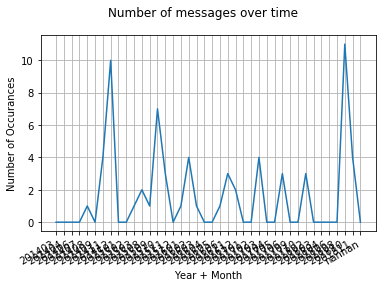

In [87]:
fig, ax = plt.subplots(1)
ax.plot(flg_ovr_time)
fig.suptitle("Number of messages over time")
ax.set_xlabel("Year + Month")
ax.set_ylabel("Number of Occurances")
ax.grid(True)
fig.autofmt_xdate()

In [90]:
demo_flg = flag_col[2]

In [71]:
flg_ovr_time = dt_gb[demo_flg].sum()

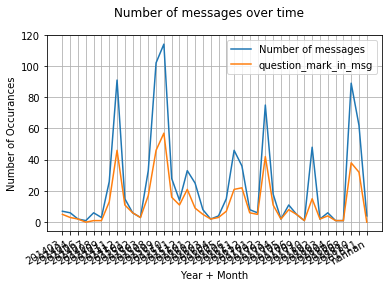

In [72]:
fig, ax = plt.subplots(1)
ax.plot(n_msg_over_time, label = "Number of messages")
ax.plot(flg_ovr_time, label = demo_flg)
fig.suptitle("Number of messages over time")
ax.set_xlabel("Year + Month")
ax.set_ylabel("Number of Occurances")
ax.grid(True)
fig.autofmt_xdate()

leg = ax.legend(loc='best', fancybox=True)
